In [5]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # librarie de plotare
import seaborn as sns # librărie construită peste matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes/diabetes (5).csv


In [8]:
dataset = pd.read_csv("/kaggle/input/diabetes/diabetes (5).csv")

In [10]:
#!pip install ydata-profiling

In [11]:
#report = ProfileReport(dataset, title="Diabetes Dataset")

In [14]:
#report

In [15]:
dataset.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [16]:
dataset.duplicated().any()

False

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


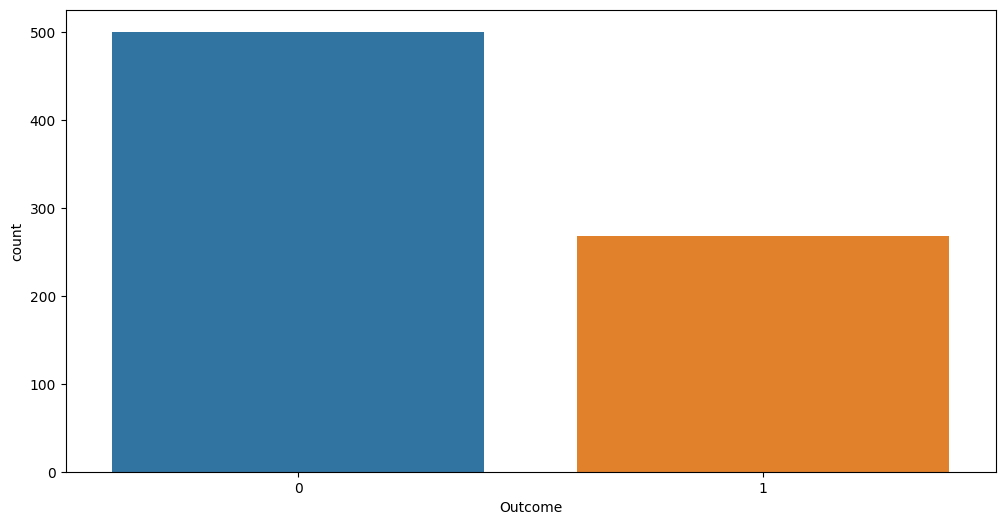

In [18]:
plt.figure(figsize = (12, 6))
sns.countplot(x="Outcome", data=dataset)
plt.show();

In [19]:
print(f"% of patients having diabetes: {sum(dataset['Outcome']) / len(dataset) * 100:.2f}%")

% of patients having diabetes: 34.90%


In [20]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

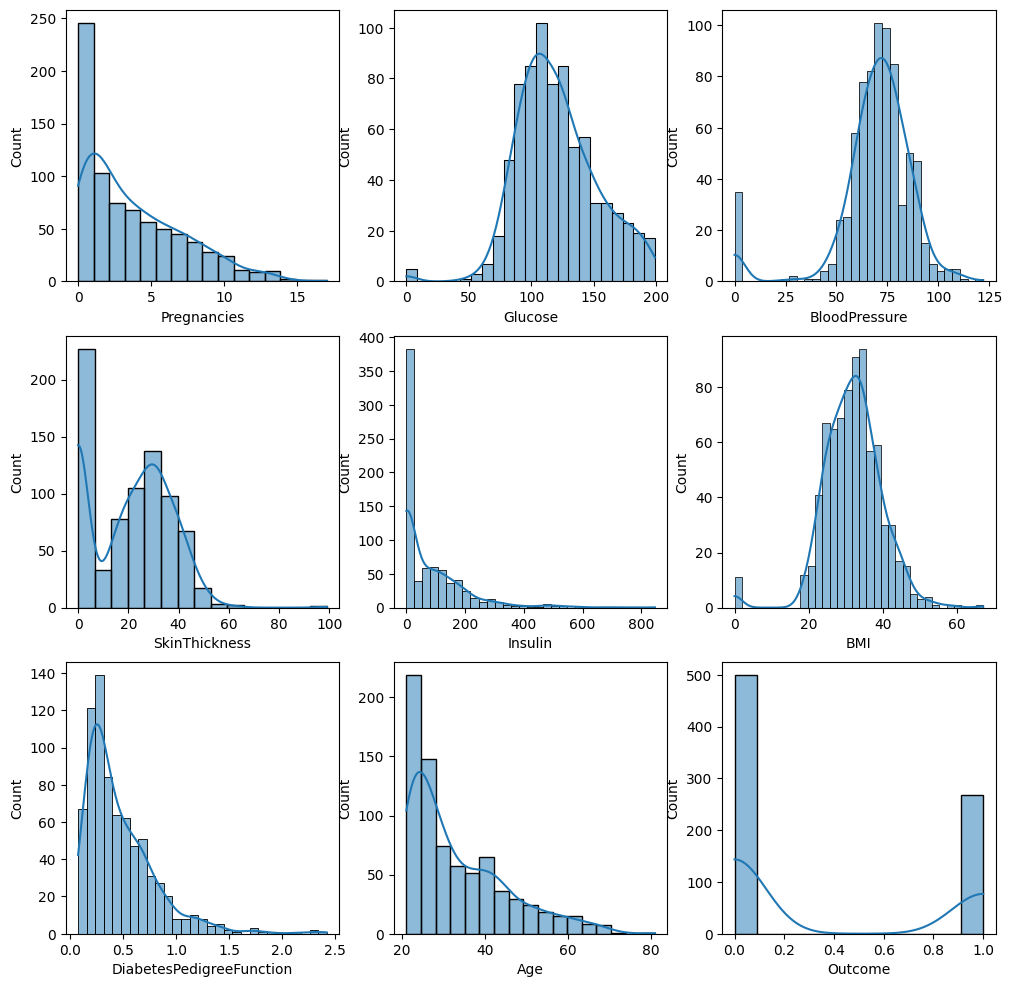

In [21]:
plt.figure(figsize = (12, 12))
for i, col in enumerate(dataset.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=col, data=dataset, kde=True)
plt.show();

In [22]:
# Pearson Correlation Coefficient
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


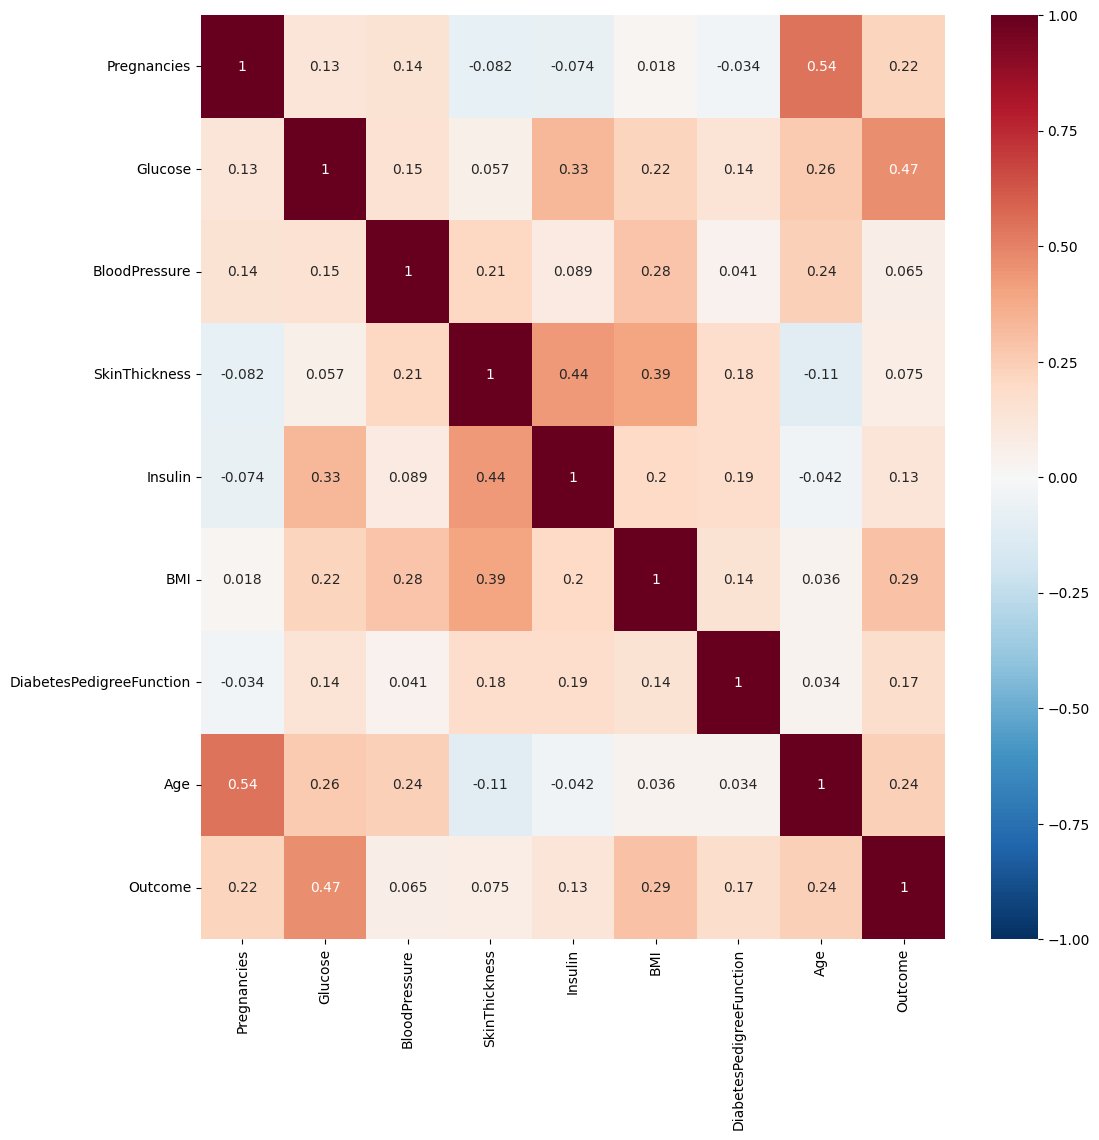

In [23]:
plt.figure(figsize=(12, 12))
sns.heatmap(dataset.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()

In [25]:
X = dataset.drop(['Outcome'], axis=1)
y = dataset['Outcome']

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
711,5,126,78,27,22,29.6,0.439,40
373,2,105,58,40,94,34.9,0.225,25
46,1,146,56,0,0,29.7,0.564,29
682,0,95,64,39,105,44.6,0.366,22
...,...,...,...,...,...,...,...,...
451,2,134,70,0,0,28.9,0.542,23
113,4,76,62,0,0,34.0,0.391,25
556,1,97,70,40,0,38.1,0.218,30
667,10,111,70,27,0,27.5,0.141,40


In [30]:
sum(y_train) / len(y_train)

0.3485342019543974

In [32]:
# Compute median Age for each (Sex, Pclass) group from training data
glucose_medians = X_train.groupby(['Pregnancies'])['Glucose'].median()

# Fill missing Age values in train and test data using the training medians
X_train['Glucose'] = X_train.apply(lambda row: age_medians[row['Pregnancies']] if pd.isna(row['Glucose']) else row['Glucose'], axis=1)
X_val['Glucose'] = X_val.apply(lambda row: age_medians[row['Pregnancies']] if pd.isna(row['Glucose']) else row['Glucose'], axis=1)

In [33]:
blood_medians = X_train.groupby(['Pregnancies'])['BloodPressure'].median()

# Fill missing Age values in train and test data using the training medians
X_train['BloodPressure'] = X_train.apply(lambda row: blood_medians[row['Pregnancies']] if pd.isna(row['BloodPressure']) else row['BloodPressure'], axis=1)
X_val['BloodPressure'] = X_val.apply(lambda row: blood_medians[row['Pregnancies']] if pd.isna(row['BloodPressure']) else row['BloodPressure'], axis=1)

In [34]:
skin_medians = X_train.groupby(['Pregnancies'])['SkinThickness'].median()

# Fill missing Age values in train and test data using the training medians
X_train['SkinThickness'] = X_train.apply(lambda row: skin_medians[row['Pregnancies']] if pd.isna(row['SkinThickness']) else row['SkinThickness'], axis=1)
X_val['SkinThickness'] = X_val.apply(lambda row: skin_medians[row['Pregnancies']] if pd.isna(row['SkinThickness']) else row['SkinThickness'], axis=1)

In [35]:
insulin_medians = X_train.groupby(['Pregnancies'])['Insulin'].median()

# Fill missing Age values in train and test data using the training medians
X_train['Insulin'] = X_train.apply(lambda row: insulin_medians[row['Pregnancies']] if pd.isna(row['Insulin']) else row['Insulin'], axis=1)
X_val['Insulin'] = X_val.apply(lambda row: insulin_medians[row['Pregnancies']] if pd.isna(row['Insulin']) else row['Insulin'], axis=1)

In [37]:
bmi_medians = X_train.groupby(['Pregnancies'])['BMI'].median()

# Fill missing Age values in train and test data using the training medians
X_train['BMI'] = X_train.apply(lambda row: bmi_medians[row['Pregnancies']] if pd.isna(row['BMI']) else row['BMI'], axis=1)
X_val['BMI'] = X_val.apply(lambda row: bmi_medians[row['Pregnancies']] if pd.isna(row['BMI']) else row['BMI'], axis=1)

In [38]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


# Train GaussianNB on continuous features
gaussian_naive_bayes = GaussianNB()
gaussian_naive_bayes.fit(X_train, y_train)

GaussianNB()

In [39]:
gaussian_naive_bayes_probs = gaussian_naive_bayes.predict(X_train)

In [40]:
# Evaluate performance
accuracy = accuracy_score(y_train, gaussian_naive_bayes_probs)
print(f"Naïve Bayes Train Accuracy: {accuracy:.4f}")

Naïve Bayes Train Accuracy: 0.7736


In [41]:
# Compute Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_train, gaussian_naive_bayes_probs).ravel()

# Compute FPR & FNR
fpr = fp / (fp + tn)  # False Positive Rate
fnr = fn / (fn + tp)  # False Negative Rate

print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

False Positive Rate (FPR): 0.1425
False Negative Rate (FNR): 0.3832


In [42]:
gnb_probs_val = gaussian_naive_bayes.predict(X_val)

In [43]:
# Evaluate performance
accuracy = accuracy_score(y_val, gnb_probs_val)
print(f"Naïve Bayes Train Accuracy: {accuracy:.4f}")

Naïve Bayes Train Accuracy: 0.7078


In [44]:
gnb_probs_proba = gaussian_naive_bayes.predict_proba(X_val)
gnb_probs_val = (gnb_probs_proba[:,1] >= 0.21).astype(int)
# Evaluate performance
accuracy_val = accuracy_score(y_val, gnb_probs_val)
print(f"Gaussian Naïve Bayes Validation Accuracy: {accuracy_val:.4f}")

# Compute Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_val, gnb_probs_val).ravel()

# Compute FPR & FNR
fpr = fp / (fp + tn)  # False Positive Rate
fnr = fn / (fn + tp)  # False Negative Rate

print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Gaussian Naïve Bayes Validation Accuracy: 0.6818
False Positive Rate (FPR): 0.3600
False Negative Rate (FNR): 0.2407


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

# Train GaussianNB on continuous features
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)
clf_probs = clf.predict(X_train)

In [46]:
# Evaluate performance
accuracy = accuracy_score(y_train, clf_probs)
print(f"Decision Tree Train Accuracy: {accuracy:.4f}")

Decision Tree Train Accuracy: 0.7964


In [47]:
# Compute Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_train, clf_probs).ravel()

# Compute FPR & FNR
fpr = fp / (fp + tn)  # False Positive Rate
fnr = fn / (fn + tp)  # False Negative Rate

print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

False Positive Rate (FPR): 0.1375
False Negative Rate (FNR): 0.3271


In [48]:
clf_probs_val = clf.predict(X_val)
# Evaluate performance
accuracy_val = accuracy_score(y_val, clf_probs_val)
print(f"Decision Tree Validation Accuracy: {accuracy_val:.4f}")

Decision Tree Validation Accuracy: 0.7987


In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [50]:
%matplotlib inline

In [51]:
features = list(X.columns)

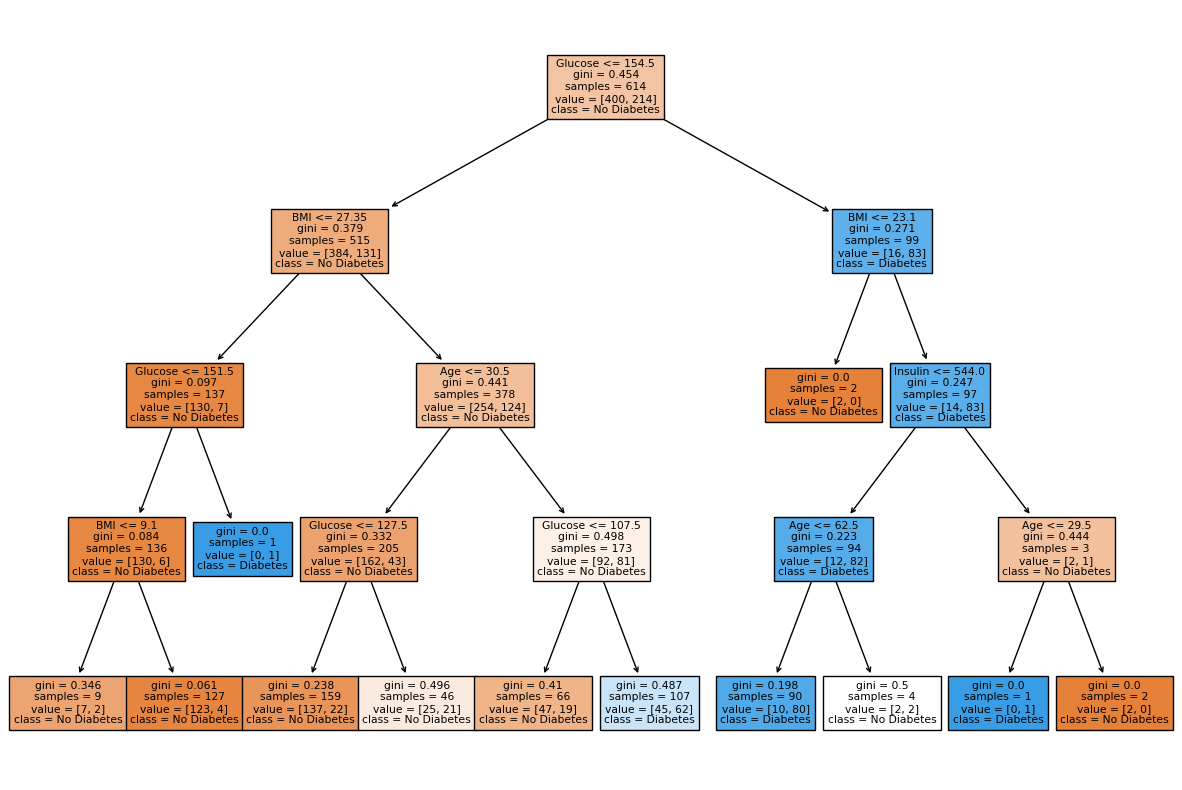

In [52]:
# Plot decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=features, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.savefig('dt.png')
plt.show()

In [53]:
# Feature importance
feature_importances = pd.DataFrame({'Feature': features, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
                     Feature  Importance
1                   Glucose    0.670911
5                       BMI    0.174665
7                       Age    0.138818
4                   Insulin    0.015606
0               Pregnancies    0.000000
2             BloodPressure    0.000000
3             SkinThickness    0.000000
6  DiabetesPedigreeFunction    0.000000


In [54]:
# Extract decision rules
from sklearn.tree import export_text
rules = export_text(clf, feature_names=features)
print("Decision Tree Rules:\n", rules)

Decision Tree Rules:
 |--- Glucose <= 154.50
|   |--- BMI <= 27.35
|   |   |--- Glucose <= 151.50
|   |   |   |--- BMI <= 9.10
|   |   |   |   |--- class: 0
|   |   |   |--- BMI >  9.10
|   |   |   |   |--- class: 0
|   |   |--- Glucose >  151.50
|   |   |   |--- class: 1
|   |--- BMI >  27.35
|   |   |--- Age <= 30.50
|   |   |   |--- Glucose <= 127.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  127.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  30.50
|   |   |   |--- Glucose <= 107.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  107.50
|   |   |   |   |--- class: 1
|--- Glucose >  154.50
|   |--- BMI <= 23.10
|   |   |--- class: 0
|   |--- BMI >  23.10
|   |   |--- Insulin <= 544.00
|   |   |   |--- Age <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  62.50
|   |   |   |   |--- class: 0
|   |   |--- Insulin >  544.00
|   |   |   |--- Age <= 29.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  29.50
|   |   |   |   |--- class: 0



In [56]:
from sklearn.tree import _tree

In [57]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [58]:
rules = get_rules(clf, features, ['No Diabetes', 'Diabetes'])
for r in rules:
    print(r)

if (Glucose <= 154.5) and (BMI > 27.35) and (Age <= 30.5) and (Glucose <= 127.5) then class: No Diabetes (proba: 86.16%) | based on 159 samples
if (Glucose <= 154.5) and (BMI <= 27.35) and (Glucose <= 151.5) and (BMI > 9.1) then class: No Diabetes (proba: 96.85%) | based on 127 samples
if (Glucose <= 154.5) and (BMI > 27.35) and (Age > 30.5) and (Glucose > 107.5) then class: Diabetes (proba: 57.94%) | based on 107 samples
if (Glucose > 154.5) and (BMI > 23.1) and (Insulin <= 544.0) and (Age <= 62.5) then class: Diabetes (proba: 88.89%) | based on 90 samples
if (Glucose <= 154.5) and (BMI > 27.35) and (Age > 30.5) and (Glucose <= 107.5) then class: No Diabetes (proba: 71.21%) | based on 66 samples
if (Glucose <= 154.5) and (BMI > 27.35) and (Age <= 30.5) and (Glucose > 127.5) then class: No Diabetes (proba: 54.35%) | based on 46 samples
if (Glucose <= 154.5) and (BMI <= 27.35) and (Glucose <= 151.5) and (BMI <= 9.1) then class: No Diabetes (proba: 77.78%) | based on 9 samples
if (Glucos

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Train GaussianNB on continuous features
random_forest = RandomForestClassifier(random_state=42, max_depth=3)
random_forest.fit(X_train, y_train)
random_forest_probs = random_forest.predict(X_train)

In [60]:
# Evaluate performance
accuracy = accuracy_score(y_train, random_forest_probs)
print(f"Random Forest Train Accuracy: {accuracy:.4f}")

Random Forest Train Accuracy: 0.7964


In [61]:
random_forest_val = random_forest.predict(X_val)

# Evaluate performance
accuracy_val = accuracy_score(y_val, random_forest_val)
print(f"Random Forest Validation Accuracy: {accuracy_val:.4f}")

Random Forest Validation Accuracy: 0.7403
